In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt


### merging 12 months of csv sales data into a single file


In [2]:
files = os.listdir("./Sales_Data/")


df = pd.DataFrame()
print(df.shape)
# df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")

for file in files:
    new_df = pd.read_csv(f"./Sales_Data/{file}")
    df = pd.concat([df, new_df])
print(df.shape)
df.to_csv("all_data.csv")


(0, 0)
(186850, 6)


### import csv containing all data


In [3]:
all_data = pd.read_csv("./all_data.csv")
all_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,1,NaN,NaN,NaN,NaN,NaN,NaN
2,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


##### Task 1: clean data


In [4]:
all_data.head()

# get all NAN rows
all_data = all_data.dropna(axis="index").reset_index()
all_data.shape
print(all_data.isna().sum())
print(all_data.isnull().sum())


index               0
Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64
index               0
Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64


In [5]:
# find 'Or' and delete it
all_data = all_data[(all_data["Order Date"].str[0:2]) != "Or"].reset_index()

##### Task 2: add a month column


In [6]:
# remove column from a dataframe
# all_data = all_data.drop(columns=["Unnamed: 0"])
all_data["Month"] = all_data["Order Date"].str[0:2].astype("int32")
all_data.head()


,level_0,index,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,0,0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,1,2,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
2,2,3,3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,3,4,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,4,5,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


##### Task 3: Add a sale column


In [7]:
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"])


all_data["sales"] = all_data["Price Each"] * all_data["Quantity Ordered"]
all_data.head()

,level_0,index,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales
0,0,0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,1,2,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,2,3,3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,3,4,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,4,5,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


##### Task 4: Add a city column

In [80]:
# all_data[['street','city','state']]=all_data['Purchase Address'].str.split(',')
# all_data['city']=all_data['city'].str.strip()
# all_data=all_data.drop(columns=['street','state'])
# all_data=all_data.drop(columns=['city'])
# all_data

# Alternate way to do it without creating extra columns:
# all_data["city"] = all_data["Purchase Address"].str.split(",").str.get(1).str.strip()
# all_data

# def getAddress(string,split_index):


split_address = all_data["Purchase Address"].str.split(",")
city = split_address.str.get(1).str.strip()
state = split_address.str.get(2).str.strip().str.split().str.get(0)
all_data["city"] = city.astype("str") + " " + state
all_data

,level_0,index,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city
0,0,0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
1,1,2,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
2,2,3,3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
3,3,4,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
4,4,5,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
...,...,...,...,...,...,...,...,...,...,...,...,...
185945,186300,186845,11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles CA
185946,186301,186846,11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco CA
185947,186302,186847,11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco CA
185948,186303,186848,11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco CA


##### Question 1: What was the best month for sales? How much was earned that month?


In [8]:
results = all_data.groupby("Month").sum()
results

,level_0,index,Unnamed: 0,Quantity Ordered,Price Each,sales
Month,,,,,,
1,699932938,701983866,47433245,10903,1811768.38,1822256.73
2,734722797,736939638,72123197,13449,2188884.72,2202022.42
3,1704524622,1709538042,115333587,17005,2791207.83,2807100.38
4,169333594,169872342,167977608,20558,3367671.02,3390670.24
5,2124278600,2130476341,137829259,18667,3135125.13,3152606.75
6,1330924534,1334894038,92330356,15253,2562025.61,2577802.26
7,1203864969,1207430793,102752005,16072,2632539.56,2647775.76
8,291782115,292646206,71824951,13448,2230345.42,2244467.88
9,2095479019,2101562504,67863032,13109,2084992.09,2097560.13


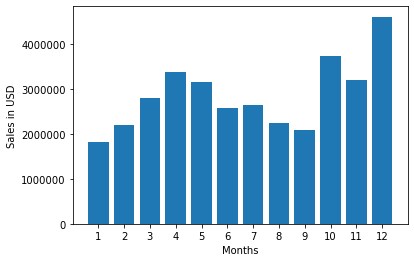

In [15]:
months = range(1, 13)
plt.bar(months, results["sales"])
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales in USD')
plt.ticklabel_format(style='plain')
plt.show()

##### Question 2: What city had the highest number of sales 

Text(0, 0.5, 'Sales in USD')

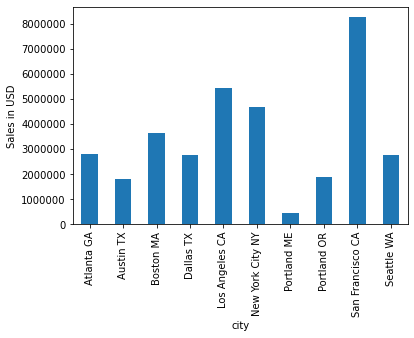

In [103]:
highest_city_sales = all_data.groupby("city")["sales"].sum()
ax = highest_city_sales.plot.bar()
ax.ticklabel_format(axis="y", style="plain")
ax.set_ylabel('Sales in USD')

##### Question 3: What time should we display ads to maximize the likelihood of customers buying product?

In [106]:
all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])
all_data

,level_0,index,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city
0,0,0,0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
1,1,2,2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
2,2,3,3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
3,3,4,4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
4,4,5,5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
...,...,...,...,...,...,...,...,...,...,...,...,...
185945,186300,186845,11681,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles CA
185946,186301,186846,11682,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco CA
185947,186302,186847,11683,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco CA
185948,186303,186848,11684,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco CA


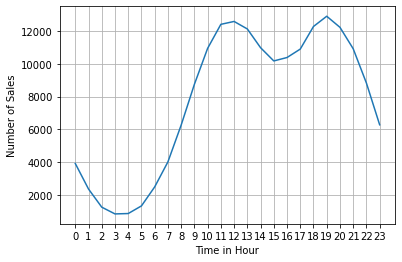

In [123]:
all_data["hour"] = all_data["Order Date"].dt.hour


highest_time_sales = all_data.groupby("hour")["sales"].count()

plt.plot(highest_time_sales)
plt.xticks(highest_time_sales.index)
plt.xlabel("Time in Hour")
plt.ylabel("Number of Sales")
plt.ticklabel_format(style="plain")
plt.grid()
plt.show()

##### Question 4: What products are most often sold together?

In [128]:
# df = all_data[all_data["Order ID"].duplicated(keep=False)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city,hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9
